In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [2]:
#Read the data to notebook
df= pd.read_csv("Insurance (2).csv")

#Check how the data looks like
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Understanding
In this section we want to do a deep dive about our data and understand it further. The dataset, `insurance.csv` that I am using for this project is sourced from kaggle where it is made public for everyone. The dataset has 1338 rows and 7 columns namely; `age,sex,bmi,children,smoker,region and charges`. There are three columns with their data types as objects, two as intergers and two as float. The summary also shows that there are no null values present.

In [3]:
#Check for the shape of dataset
df.shape

(1338, 7)

In [4]:
# Check for the data types present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Check for statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Cleaning
In this section I am checking to see if my data has mising `values` and `duplicates`. I will drop duplicates if they are present and fill the null values if present.  Filling missing data with `mean for continous data` and `Mode for categorical data` will be strategy to use. There are no missing values in our data but a duplicate existed in `row 581`. I dropped the duplicated row.

In [6]:
#Check for null values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Check for duplicates
df.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [8]:
#Check for the specific duplicated
duplicated_rows = df[df.duplicated()]
print("Exact Duplicated Rows:\n", duplicated_rows)

Exact Duplicated Rows:
      age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [9]:
#Drop the duplicated row using index
df= df.drop(index=581)

In [10]:
#Check for duplicates
df.duplicated().value_counts()

False    1337
dtype: int64

## Exploratory Data Analysis
I am going to check the patterns, stucture and relationships between my data using visualizations at this point. This will help me understand my data on a deeper level before introducing machine learning to it. 

### Correlation between features

In [11]:
# Check for the correlation between features
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


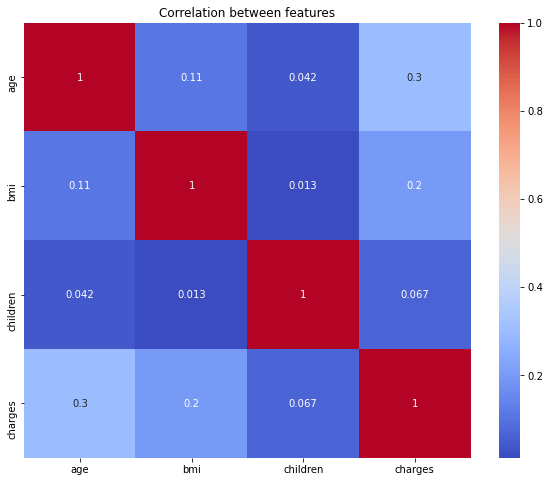

In [12]:
#visualiation of the correlation
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot= True, cmap= "coolwarm")
plt.title("Correlation between features");

### Distribution of gender

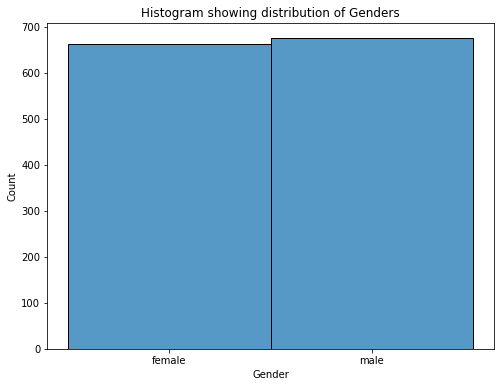

In [13]:
#Distribution of gender
plt.figure(figsize=(8,6))
sns.histplot(df['sex'],bins= 5)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Histogram showing distribution of Genders');

In [14]:
#Exact values for male and females
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

There are more males than females. The males are 675 while females are 662

### Distribution of the number of children per person

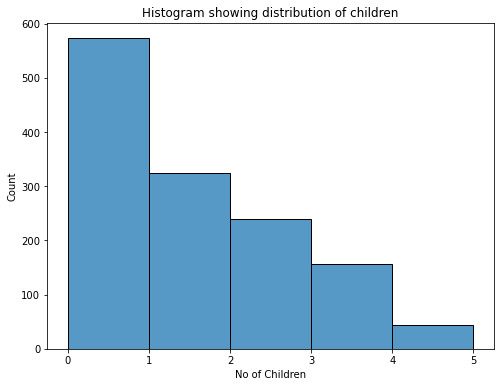

In [15]:
#Distribution of the number of children
plt.figure(figsize=(8,6))
sns.histplot(df['children'],bins= 5)
plt.xlabel('No of Children')
plt.ylabel('Count')
plt.title('Histogram showing distribution of children');

In [16]:
# Exact number of children per person
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

The number of children one has can affect their insurance charge in that those with many children could be required to pay more. A high number of people`(573 people)` in this study have no children, followed by `324 people` who have `1 child`. The highest number is `5 children` recorded by `18 people`

### Distribution of smokers and non-smokers

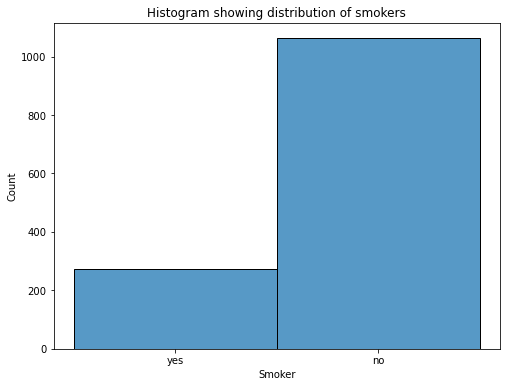

In [17]:
#Distribution of smokers and non-smokers
plt.figure(figsize=(8,6))
sns.histplot(df['smoker'],bins= 5)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Histogram showing distribution of smokers');

In [18]:
#Exact number of smokers
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

The number of smokers is lower than those who don't smoke. Those who smoke are 274 while the `non-smokers are 1063` 

### Relationship between smoking and Insurance Charges

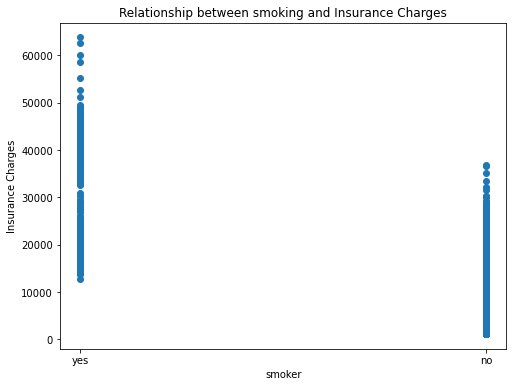

In [19]:
#Relationship between smoking and insurance charges
plt.figure(figsize=(8,6))
plt.scatter(df['smoker'],df['charges'])
plt.xlabel('smoker')
plt.ylabel('Insurance Charges')
plt.title('Relationship between smoking and Insurance Charges');

There is no correlation between smoking and the price of insurance charges.

### Relationship between region and Insurance Charges

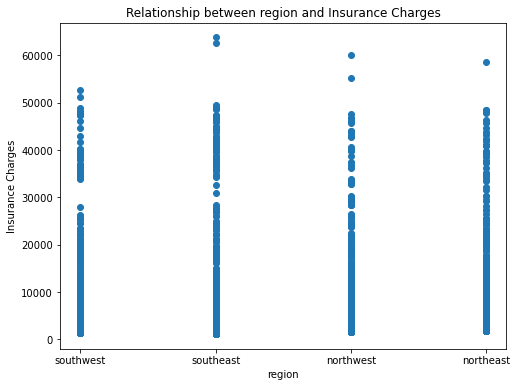

In [20]:
#Relationship between region and insurance charges
plt.figure(figsize=(8,6))
plt.scatter(df['region'],df['charges'])
plt.xlabel('region')
plt.ylabel('Insurance Charges')
plt.title('Relationship between region and Insurance Charges');

There is no correlation between region and the price of insurance charge

### Relationship between bmi and Insurance charges

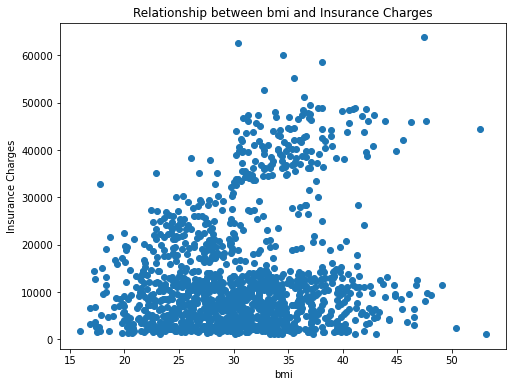

In [21]:
#Relationship between bmi and insurance charges
plt.figure(figsize=(8,6))
plt.scatter(df['bmi'],df['charges'])
plt.xlabel('bmi')
plt.ylabel('Insurance Charges')
plt.title('Relationship between bmi and Insurance Charges');

There is a `positive correlation` between `bmi` and the `insurance charge`. This means that as the bmi of a person increases, the price they have to pay for insurance charges also increases.

## Pre-Processing Data
The features present in the dataset are not ready to be used in a machine learning model to help in making predictions. Categorical values can't be fed into a model and therefore they have to be encoded first into numerical values. The next step will be identifying the `target variable` and the `features` of our model We also have to split our data into two sets namely ;`training set` and `test set`.

In [22]:
# encode categorical variables to numerical
df_encoded = pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [23]:
#Select the target(y) and the features(X)
y= df_encoded['charges']
X=df_encoded.drop(columns="charges")

In [24]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
#scale data
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Modelling
With the data being ready for modelling. we can now fit it to our preffered model and train to see how it perfoms. The perfomance of the model will be measured using metrics provided in sklearn class.

#### 1. sklearn linear Regression(Baseline Model)

In [26]:
#Fit the model
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [27]:
#Make predictions with the model
y_pred = model.predict(X_test_scaled)

#### Evaluate the model

In [28]:
# Calculate the mse
mse= mean_squared_error(y_test,y_pred)

print(f"The mean squared error is:{mse}")

The mean squared error is:38236995.09360465


In [29]:
#Model coeffiecient (R2)
R2= model.score(X_test_scaled,y_test)
print(f'The model coefficient is:{R2}')

The model coefficient is:0.7919143768498847


The model is perfoming well in that it has a high R2 value(0.79). This means that the model can explain almost 80% of the variance of the charge(target variable). The model has a `mse score` of `38,236,995`
- For a detailed metric summary we can use the statsmodels Model which also shows the coeffiecients of each variable and the p values.

#### 2. Statsmodels linear regression

In [30]:

#Add constant to our scaled x
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns,index=X.index) 
X_constant= sm.add_constant(X_scaled)

In [31]:
#Fit the Ols model
model1= sm.OLS(y,X_constant).fit()

In [32]:
#Print out the metrics summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        07:23:18   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.328e+04    165.850  

- The model shows that the independent variables can explain about 75% of the variation in `charge`.
- Overally the model is `statistically significant` with a F_statistic value of 0.00 which is less than 0.05.
- Two variables `sex_male` and `region_northwest` do not affect the charge and therefore have no effect on the model. They have p values of `0.698` and `0.464` respectively rendering them statistically insignificant.
- With an increase in age and all other variables held constant, charge increases by 3,604.74
- With an increase in bmi and all other variables held constant, charge increases by 2,068.81
- With an increase in the number of children by 1 and all other variables held constant, charge increases by 572.22
- Smokers pay 9,626.10 more in charges than non-smokers
- Living in the Southeast reduces charges by 460.82
- Living in the Southeast reduces charges by 411.82

#### 3.Decision Tree Model

In [33]:
# Instantiate the model
dt_model = DecisionTreeRegressor(max_depth=5,random_state=42)

In [34]:
#Fit the model with training data
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [35]:
#Make predictions
y_pred1 = dt_model.predict(X_test)



#### Evaluate the model

In [36]:

# Calculate the mse
mse= mean_squared_error(y_test,y_pred1)

print(f"The mean squared error is:{mse}")

The mean squared error is:19461664.316805515


In [37]:
#Model coeffiecient (R2)
R2= dt_model.score(X_test,y_test)
print(f'The model coefficient is:{R2}')

The model coefficient is:0.8940896757972968


The model is `perfoming well and better than the baseline model` as it has `a higher R2 value` and `a lower mse score`. it has a high R2 value(0.89). This means that the model can explain almost 90% of the variance of the charge(target variable). The model has a `mse score` of `19,461,664`

#### 4.RandomForest Model

In [38]:
#Initialize the random forest model
rf_model = RandomForestRegressor(random_state=42)

In [39]:
# Fit the model 
rf_model.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [40]:
# Make predictions with the model
y_pred2 = rf_model.predict(X_test)

#### Evaluate the model

In [41]:
# Calculate the mse
mse= mean_squared_error(y_test,y_pred2)

print(f"The mean squared error is:{mse}")

The mean squared error is:22113000.538090803


In [42]:
#Model coeffiecient (R2)
R2= rf_model.score(X_test,y_test)
print(f'The model coefficient is:{R2}')

The model coefficient is:0.8796611113027272


The model is `perfoming well but not better than the Decision Tree model` as it has `a lower R2 value` and `a higher mse score`. it has a relatively low R2 value(0.88). This means that the model can explain almost 90% of the variance of the charge(target variable). The model has a `mse score` of `22,113,000`

#### 5. Tuned Decision Tree Model
Seeing that Decison Tree model stands out as the most perfoming model from the models that we already have, we can tune it with hyperparameters to improve its perfomance even further.

In [43]:
# Fit the decision Tree model with hyperparamaters
dt_model1 = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model1.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [44]:
#Make predictions with the model
y_pred3=dt_model1.predict(X_test)

#### Evaluate the model

In [45]:
# Calculate the mse
mse= mean_squared_error(y_test,y_pred3)

print(f"The mean squared error is:{mse}")

The mean squared error is:19151787.262594018


In [46]:
#Model coeffiecient (R2)
R2=dt_model1.score(X_test,y_test)
print(f'The model coefficieAnt is:{R2}')

The model coefficieAnt is:0.895776025882278


The model is `perfoming well and better than all the other models` as it has `a higher R2 value` and `a lower mse score`. it has a high `R2 value` of `0.8957`. This means that the model can explain almost 90% of the variance of the charge(target variable). The model has a `mse score` of `19151787`

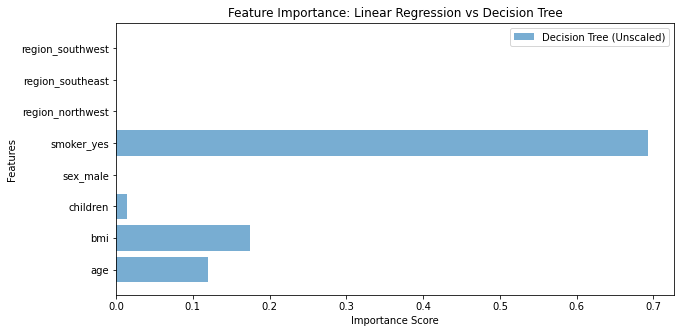

In [47]:
# Decision Tree Feature Importance
feature_importance_dt = dt_model1.feature_importances_

features = X_train.columns

plt.figure(figsize=(10, 5))
#plt.barh(features, feature_importance_lr, alpha=0.6, label="Linear Regression (Scaled)")
plt.barh(features, feature_importance_dt, alpha=0.6, label="Decision Tree (Unscaled)")

plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.legend()
plt.title("Feature Importance: Linear Regression vs Decision Tree")
plt.show()

In [48]:
# Get feature importance values
feature_importance = dt_model.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


            Feature  Importance
4        smoker_yes    0.691315
1               bmi    0.173658
0               age    0.120079
2          children    0.014949
3          sex_male    0.000000
5  region_northwest    0.000000
6  region_southeast    0.000000
7  region_southwest    0.000000


It is evident that there are features that do not add value to our model. These values can affect the perfomance of the model and therefore should be dropped. The features with `0.00 importance` are to be `dropped`.

In [49]:
#Drop features with zero importance 
low_importance_features = feature_importance_df[feature_importance_df['Importance'] == 0]['Feature'].tolist()
X_train1 = X_train.drop(columns=low_importance_features)
X_test1 = X_test.drop(columns=low_importance_features)


 #### 6. Final model

 After identifying the model that perfoms better than all the others, we pick it and use to fit the last model, but with non-important features dropped. The feautures that do no contribute to predicting charge can actually affect the model. The model will be decision tree regressor fitted with `X-train1` and `X_test1`.

In [50]:
# Fit the decision Tree model with hyperparamaters
dt_model2 = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model2.fit(X_train1, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [51]:
#Make predictions with the model
y_pred4=dt_model2.predict(X_test1)

#### Evaluate the model

In [52]:
# Calculate the mse
mse= mean_squared_error(y_test,y_pred4)

print(f"The mean squared error is:{mse}")

The mean squared error is:19151787.262594018


In [53]:
#Model coeffiecient (R2)
R2=dt_model2.score(X_test1,y_test)
print(f'The model coefficieAnt is:{R2}')

The model coefficieAnt is:0.895776025882278


The model has the same metrics as our decision tree model with tuned hyperparameters. it has a high `R2 value` of `0.8957`. This means that the model can explain almost 90% of the variance of the charge(target variable). The model has a `mse score` of `19151787`. We therefore conclude that dropping the features with zero imporatnce does not improve the perfomance of our model.

In [55]:
#Save the work in excel format
#df.to_excel('insurance.xlsx',index=False)